# ДЗ по курсу: Основы языка Python для аналитиков

## Урок 4. Визуальный анализ данных

## Условие 1:
Постройте график  
Назовите график  
Сделайте именование оси x и оси y  
Сделайте выводы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format 

### 1.1. Скачать данные (недвижимость)

In [3]:
df = pd.read_csv('kc_house_data.csv', encoding='latin-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### 1.2 Изучите стоимости недвижимости

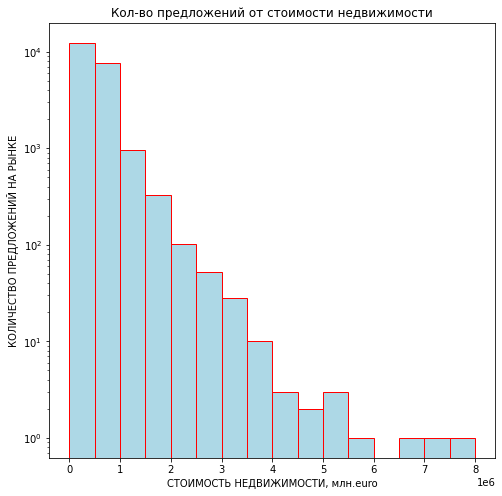

In [4]:
fig, ax = plt.subplots(figsize=(8,8))
bins = [i for i in range(0, 8_500_000, 500_000)]
ax.hist(df['price'], bins, log = True, color='lightblue', ec='red')
plt.title('Кол-во предложений от стоимости недвижимости')
plt.xlabel('СТОИМОСТЬ НЕДВИЖИМОСТИ, млн.euro')
plt.ylabel('КОЛИЧЕСТВО ПРЕДЛОЖЕНИЙ НА РЫНКЕ')
plt.show();

### 1.3 Изучите распределение квадратуры жилой

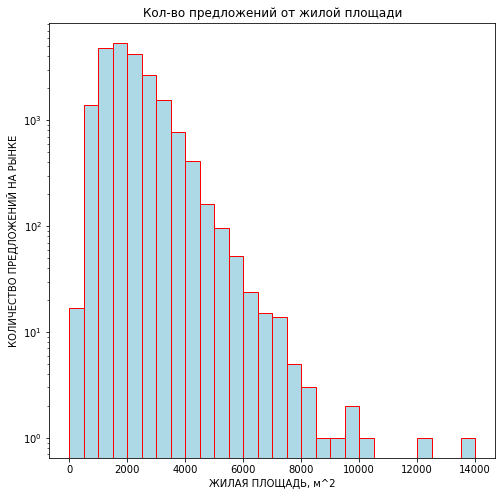

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
bins = [i for i in range(0, 14_500, 500)]
ax.hist(df['sqft_living'], bins, log = True, color='lightblue', ec='red')
plt.title('Кол-во предложений от жилой площади')
plt.xlabel('ЖИЛАЯ ПЛОЩАДЬ, м^2')
plt.ylabel('КОЛИЧЕСТВО ПРЕДЛОЖЕНИЙ НА РЫНКЕ')
plt.show();

### 1.4 Изучите распределение года постройки

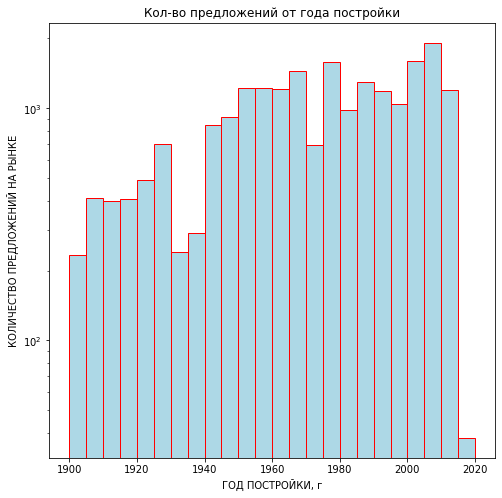

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
bins = [i for i in range(1900, 2022, 5)]
ax.hist(df['yr_built'], bins, log = True, color='lightblue', ec='red')
plt.title('Кол-во предложений от года постройки')
plt.xlabel('ГОД ПОСТРОЙКИ, г')
plt.ylabel('КОЛИЧЕСТВО ПРЕДЛОЖЕНИЙ НА РЫНКЕ')
plt.show();

## Условие 2:

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график  
Сделайте выводы

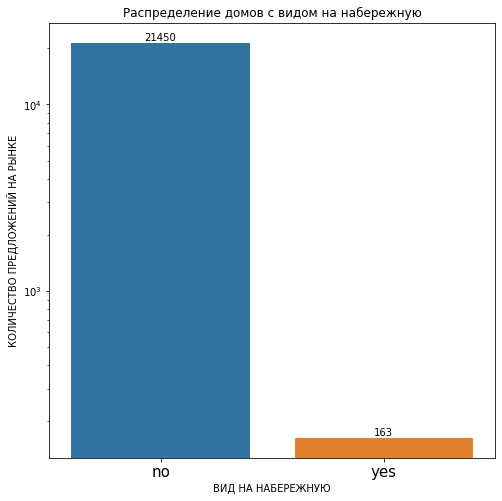

In [7]:
counts = df['waterfront'].value_counts()

fig, ax = plt.subplots(figsize=(8,8))
g = sns.barplot(x=counts.index, y=counts.values)
g.set_yscale("log")
plt.title('Распределение домов с видом на набережную')
plt.xlabel('ВИД НА НАБЕРЕЖНУЮ')
plt.ylabel('КОЛИЧЕСТВО ПРЕДЛОЖЕНИЙ НА РЫНКЕ')
g.set_xticklabels(['no', 'yes'], fontsize=15)
g.bar_label(ax.containers[0])

plt.show();

## 2.2 Изучите распределение этажей домов

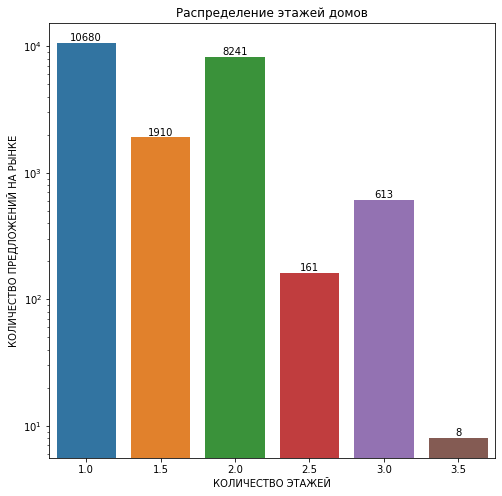

In [8]:
counts = df['floors'].value_counts()

fig, ax = plt.subplots(figsize=(8,8))
g = sns.barplot(x=counts.index, y=counts.values)
g.set_yscale("log")
plt.title('Распределение этажей домов')
plt.xlabel('КОЛИЧЕСТВО ЭТАЖЕЙ')
plt.ylabel('КОЛИЧЕСТВО ПРЕДЛОЖЕНИЙ НА РЫНКЕ')
g.bar_label(ax.containers[0])

plt.show();

## 2.3 Изучите распределение состояния домов

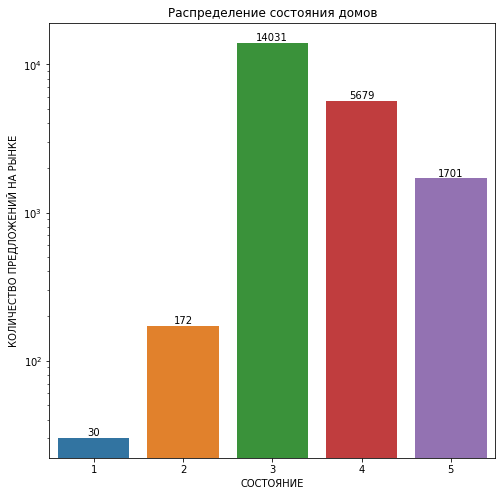

In [13]:
counts = df['condition'].value_counts()

fig, ax = plt.subplots(figsize=(8,8))
g = sns.barplot(x=counts.index, y=counts.values)
g.set_yscale("log")
plt.title('Распределение состояния домов')
plt.xlabel('СОСТОЯНИЕ')
plt.ylabel('КОЛИЧЕСТВО ПРЕДЛОЖЕНИЙ НА РЫНКЕ')
g.bar_label(ax.containers[0])

plt.show();

## Условие 3:
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.  
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [15]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
price,0.00,1.00,0.30,0.50,0.70,0.00,0.30,0.30,0.40,0.00,0.70,0.60,0.30,0.00,0.00,0.00,0.30,0.00,0.60,0.00
bedrooms,0.00,0.30,1.00,0.50,0.60,0.00,0.00,0.00,0.00,0.00,0.40,0.50,0.30,0.00,0.00,0.00,0.00,0.00,0.40,0.00
bathrooms,0.00,0.50,0.50,1.00,0.80,0.00,0.50,0.00,0.00,0.00,0.70,0.70,0.30,0.50,0.00,0.00,0.00,0.00,0.60,0.00
sqft_living,0.00,0.70,0.60,0.80,1.00,0.00,0.40,0.00,0.30,0.00,0.80,0.90,0.40,0.30,0.00,0.00,0.00,0.00,0.80,0.00
sqft_lot,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70
floors,0.00,0.30,0.00,0.50,0.40,0.00,1.00,0.00,0.00,-0.30,0.50,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.30,0.00
waterfront,0.00,0.30,0.00,0.00,0.00,0.00,0.00,1.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
view,0.00,0.40,0.00,0.00,0.30,0.00,0.00,0.40,1.00,0.00,0.30,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.30,0.00
condition,0.00,0.00,0.00,0.00,0.00,0.00,-0.30,0.00,0.00,1.00,0.00,0.00,0.00,-0.40,0.00,0.00,0.00,0.00,0.00,0.00


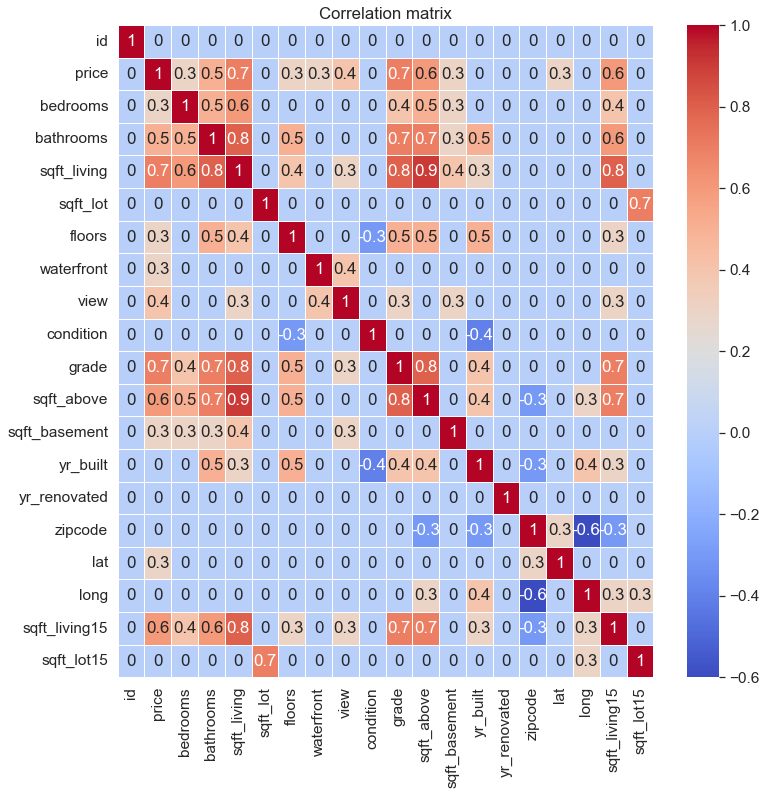

In [18]:
# Выведим тепловую карту
plt.figure(figsize=(12, 12))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

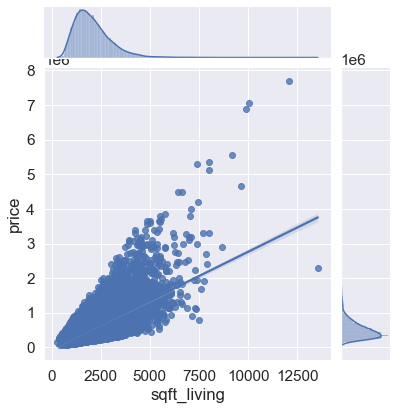

In [39]:
# Определим корреляцию ЦЕНЫ и ЖИЛОЙ ПЛОЩАДИ
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

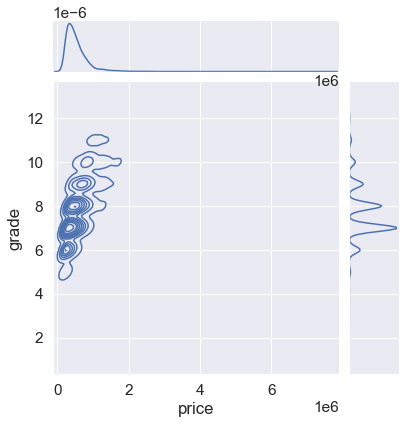

In [24]:
# Определим корреляцию ЦЕНЫ и ОЦЕНКИ ДОМА
sns.jointplot(x=df['price'], y=df['grade'], kind='kde');

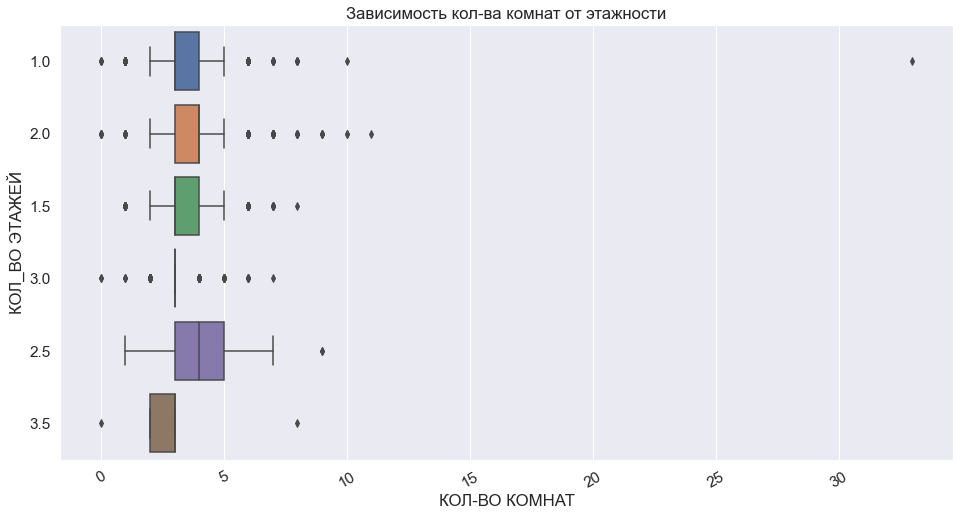

In [50]:
# # Определим корреляцию КОЛ-ВА КОМНАТ и ЭТАЖНОСТИ
plt.figure(figsize=(16, 8))
sns.boxplot(x=df['bedrooms'], y=df['floors'].astype('str'), whis=1.5);
#plt.xlim([0, 12])
plt.xlabel('КОЛ-ВО КОМНАТ')
plt.ylabel('КОЛ_ВО ЭТАЖЕЙ')
plt.title('Зависимость кол-ва комнат от этажности');
plt.xticks(rotation = 30);

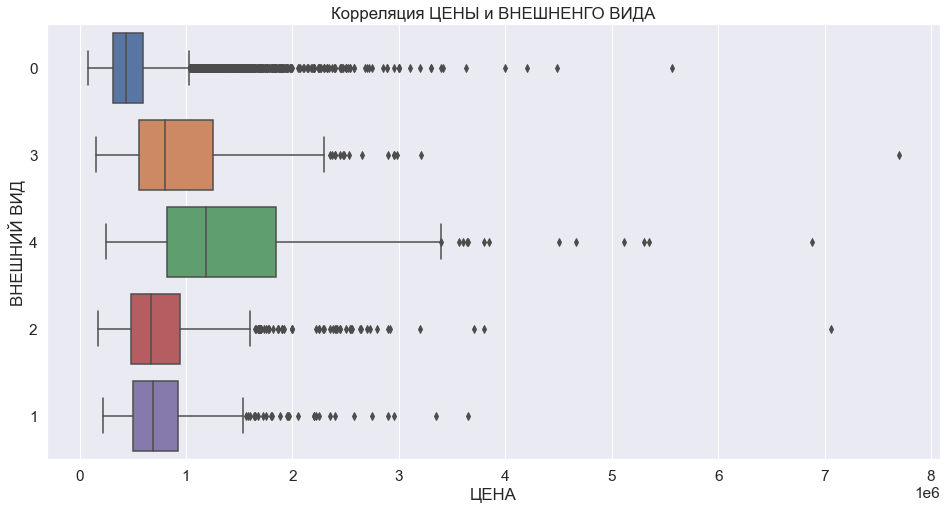

In [51]:
# Определим корреляцию ЦЕНЫ и ВНЕШНЕНГО ВИДА
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('ЦЕНА')
plt.ylabel('ВНЕШНИЙ ВИД')
plt.title('Корреляция ЦЕНЫ и ВНЕШНЕНГО ВИДА');

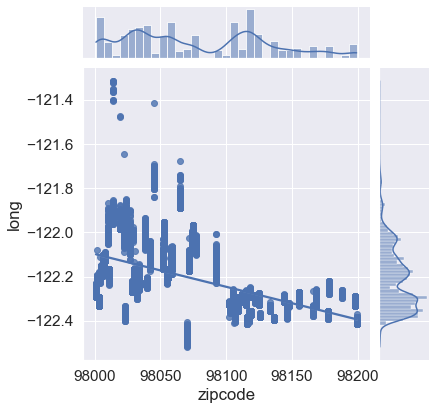

In [52]:
# Определим корреляцию УДАЛЕННОСТИ и ПОЧТОВОГО ИНДЕКСА
sns.jointplot(x=df['zipcode'], y=df['long'], kind='reg');